## Replication of Fig. 1 from the paper entitled "Improving FEMA P-58 Non-Structural Component Fragility Functions and Loss Predictions" by Cremen and Baker 

In [34]:
from __future__ import division, print_function

from scipy.optimize import minimize
from scipy.stats import norm, lognorm
import numpy as np
import pandas as pd
import StringIO
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt


### Replication of likelihood function presented in the paper

In [35]:
def likelihood_rep(x, data):
    mu, std = x[0], x[1]

    temp = 0.0
    n = data['M'].values.sum()
    edp_max = 0
    m = 0
    for _, row in data.iterrows():
        if row['m']:
            m += row['m']
            temp += row['m']*np.log(lognorm.pdf(row['PFA'], std, loc=0, scale=mu))
        else:
            edp_max = max(row['PFA'], edp_max)
    temp += (n-m) * np.log(1-lognorm.cdf(edp_max, std, loc=0, scale=mu))
    return -1.0*temp



### Likelihood function for a binomial distribution

In [36]:
def likelihood(x, data):
    mu, std = x[0], x[1]

    temp = 0.0
    for _, row in data.iterrows():
        p = lognorm.cdf(row['PFA'], std, loc=0, scale=mu)
        temp += row['m'] * np.log(p) + (row['M']-row['m']) * np.log(1-p)

    return -1.0*temp


### chiller (installation category 3)

In [37]:
data_txt = StringIO.StringIO("""
PFA,M,m
0.20,4,0 
0.35,1,0 
0.35,4,0 
0.37,4,0 
0.40,2,0 
0.40,3,0 
0.42,4,0 
0.50,2,0 
0.60,2,0 
0.80,1,1
""")

chiller = pd.read_csv(data_txt)


### disel generator (installation category 3)

In [38]:
data_txt = StringIO.StringIO("""
PFA,M,m
0.12,1,1
0.14,1,0
0.2,3,0
0.2,17,0
0.2,4,0
0.25,13,0
0.25,15,0
0.25,1,0
0.25,1,0
0.25,13,0
0.25,1,1
0.26,1,0
0.3,1,0
0.3,6,0
0.3,1,0
0.3,1,0
0.3,3,2
0.3,5,3
0.4,2,0
0.4,2,0
0.4,1,0
0.4,6,0
0.4,4,0
0.5,1,0
0.5,3,0
0.5,1,0
0.6,18,0
0.85,1,0
""")

generator = pd.read_csv(data_txt)

#### Fig 1 (a)

In [45]:
p_chiller_rep = minimize(likelihood_rep, x0=(0.5, 0.5), args=chiller, bounds=[(0.0, 5.0), (0.2, 0.6)])
print(p_chiller_rep.x)

[ 0.94254087  0.2       ]


/Users/hyeuk/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log


In [46]:
p_chiller = minimize(likelihood, x0=(0.5, 0.5), args=chiller, bounds=[(0.0, 5.0), (0.2, 0.6)])
print(p_chiller.x)


[ 0.75346611  0.2       ]


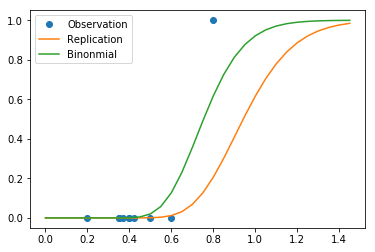

In [48]:
pfa = np.arange(0.0, 1.5, 0.05)
plt.plot(chiller['PFA'], chiller['m']/chiller['M'], 'o', label='Observation')
plt.plot(pfa, lognorm.cdf(pfa, p_chiller_rep.x[1], loc=0, scale=p_chiller_rep.x[0]), label='Replication')
plt.plot(pfa, lognorm.cdf(pfa, p_chiller.x[1], loc=0, scale=p_chiller.x[0]), label='Binonmial')
plt.legend(loc=2)

#### Fig 1(b)

In [49]:
p_generator_rep = minimize(likelihood_rep, x0=(0.5, 0.5), args=generator, bounds=[(0.0, 5.0), (0.2, 0.6)])
print(p_generator_rep.x)


/Users/hyeuk/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log


[ 5.   0.6]


In [51]:
p_generator = minimize(likelihood, x0=(0.5, 0.5), args=generator, bounds=[(0.0, 5.0), (0.2, 0.6)])
print(p_generator.x)

[ 0.8704127  0.6      ]


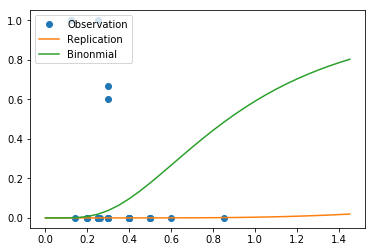

In [52]:
plt.plot(generator['PFA'], generator['m']/generator['M'], 'o', label='Observation')
plt.plot(pfa, lognorm.cdf(pfa, p_generator_rep.x[1], loc=0, scale=p_generator_rep.x[0]), label='Replication')
plt.plot(pfa, lognorm.cdf(pfa, p_generator.x[1], loc=0, scale=p_generator.x[0]), label='Binonmial')
plt.legend(loc=2)